Found 442 files belonging to 2 classes.
['doente', 'saudavel']
1/1 [==============================] - 0s 365ms/step
Classe: doente
Conficanca: 72.65


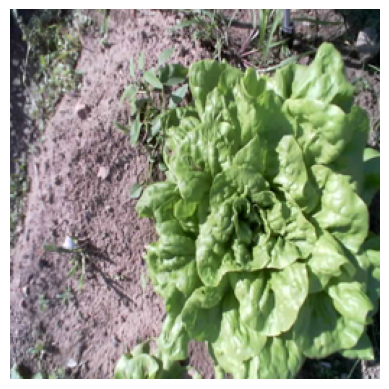

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

imageSize = 256

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/", #nome do diretório
    shuffle=True, #randomizando a rde das imagens
    image_size = (256, 256),#altera a dimensão da imagem para  256x256 pixels
    batch_size = 32 #número de imagens que serão processadas em conjunto em cada iteração durante o treinamento ou inferência do modelo. Lote de imagens.
)

classNames = dataset.class_names
print(classNames)

# Caminho correto do modelo
modelo_path = "models/1/"  # Diretório onde o modelo foi salvo
caminho_imagem = r"entrada/s1.jpg"

resizeAndRescale = tf.keras.Sequential([
#preprocessamento para alterar o tamanho da imagem para 256x256, caso a imagem não tenha essa dimensão
    layers.experimental.preprocessing.Resizing(imageSize,imageSize),
#preprocessamento para alterar a escala entre um valor de 0 a 1 (faixa de valores aceita pelo numpy é de 0 a 255)
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

def carregar_modelo(caminho):
    if not os.path.exists(caminho):
        raise FileNotFoundError(f"O diretório do modelo não foi encontrado: {caminho}")
    modelo = load_model(caminho)
    return modelo

def predict_imagem_sistema_de_arquivo(model, image):
        # Redimensiona e normaliza a imagem para 256x256
    image = tf.image.resize(image, (imageSize, imageSize))  # Resize
    image = image / 255.0  # Normalização
    
    imageArray = tf.keras.preprocessing.image.img_to_array(image)
    imageArray = tf.expand_dims(imageArray, 0)  # Adiciona dimensão de batch

    predictions = model.predict(imageArray)[0, 0]  # Pegamos o valor escalar

    # Se o modelo usa sigmoid na saída
    predictedClass = classNames[1] if predictions >= 0.5 else classNames[0]
    confidence = round(100 * (predictions if predictions >= 0.5 else 1 - predictions), 2)

    return predictedClass, confidence

    return predictions

def carregar_imagem(caminho):
    if not os.path.exists(caminho):
        raise FileNotFoundError(f"A imagem não foi encontrada: {caminho}")
    imagem = cv2.imread(caminho)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    return imagem

def preprocessar_imagem(imagem, tamanho=(256, 256)):
    imagemPreprocessada = resizeAndRescale(imagem)
    return imagemPreprocessada


modelo = carregar_modelo(modelo_path)
imagem = carregar_imagem(caminho_imagem)

predicao, confianca = predict_imagem_sistema_de_arquivo(modelo, imagem)

print(f"Classe: {predicao}\nConficanca: {confianca}")

imagemOriginal = np.array(Image.open(caminho_imagem).convert("RGB").resize((256, 256)))
plt.imshow(imagemOriginal)  # Usando a imagem original (antes da normalização)
plt.axis('off')  # Desativa os eixos
plt.show()


In [1]:
diretorio_atual = os.getcwd()
diretorio_atual

NameError: name 'os' is not defined